In [85]:
import pandas as pd
import csv

data=pd.read_csv('Data/preprocessed_data.csv')


In [87]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('FraudResult', axis=1)  # All columns except the target
y = data['FraudResult']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Check the shape of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(76529, 25) (19133, 25) (76529,) (19133,)


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.54      0.38      0.45        39

    accuracy                           1.00     19133
   macro avg       0.77      0.69      0.72     19133
weighted avg       1.00      1.00      1.00     19133

ROC-AUC Score: 0.6919672712330092


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [89]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.97      0.87      0.92        39

    accuracy                           1.00     19133
   macro avg       0.99      0.94      0.96     19133
weighted avg       1.00      1.00      1.00     19133

ROC-AUC Score: 0.9358712496609218


# **Handle Class Imbalance**
If the dataset is imbalanced (e.g., very few fraud cases), the model might be biased toward the majority class. Use techniques to handle class imbalance.

## Option 1: Class Weights
Adjust class weights in the model to penalize misclassification of the minority class

In [90]:
# Initialize the model with class weights
rf_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
rf_balanced.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_balanced.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.94      0.82      0.88        39

    accuracy                           1.00     19133
   macro avg       0.97      0.91      0.94     19133
weighted avg       1.00      1.00      1.00     19133

ROC-AUC Score: 0.9102040377833821


## Option 2: SMOTE (Synthetic Minority Oversampling Technique)
Oversample the minority class using SMOTE.

In [91]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize the model
rf_smote = RandomForestClassifier(random_state=42)

# Train the model
rf_smote.fit(X_train_smote, y_train_smote)

# Predict on the test set
y_pred = rf_smote.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.74      0.87      0.80        39

    accuracy                           1.00     19133
   macro avg       0.87      0.94      0.90     19133
weighted avg       1.00      1.00      1.00     19133

ROC-AUC Score: 0.9355832010592668


# Feature Importance
Analyze the importance of each feature in the model.

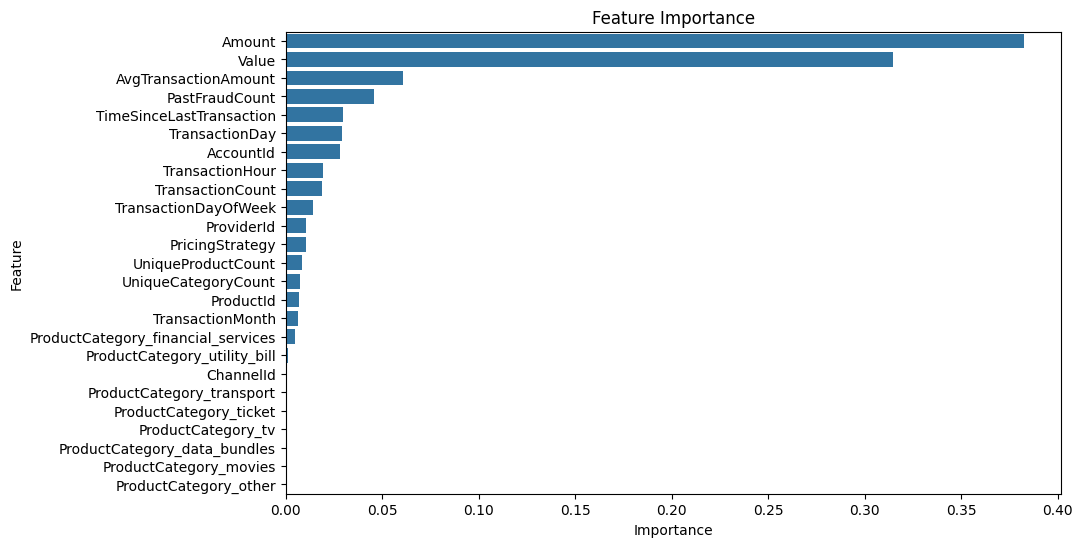

In [92]:
# Get feature importances from the Random Forest model
importances = rf.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.show()

# Hyperparameter Tuning
Optimize the model’s hyperparameters using techniques like Grid Search or Random Search.

In [93]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42)

# Perform grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best ROC-AUC Score:", grid_search.best_score_)

# Train the model with the best parameters
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("ROC-AUC Score:", roc_auc_score(y_test, y_pred))

Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Best ROC-AUC Score: 0.9962052213956016
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19094
           1       0.94      0.87      0.91        39

    accuracy                           1.00     19133
   macro avg       0.97      0.94      0.95     19133
weighted avg       1.00      1.00      1.00     19133

ROC-AUC Score: 0.9358450634244077


# Evaluate the Final Model
Evaluate the final model’s performance on the test set using metrics like:
- Accuracy
- Precision
- Recall
- F1-Score
- ROC-AUC

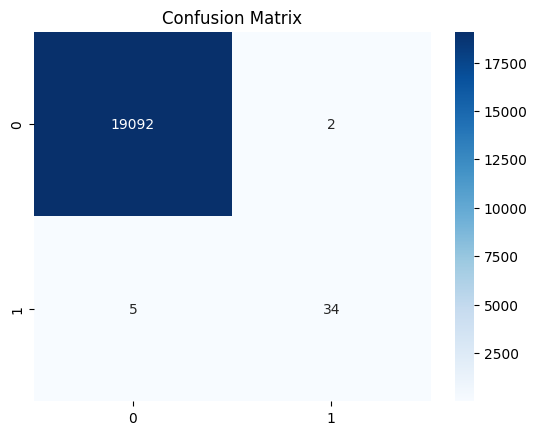

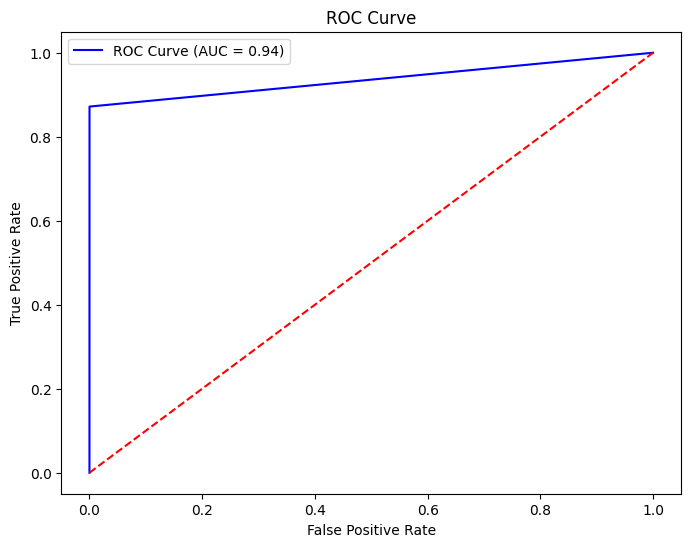

In [94]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Save the Model
Save the trained model for future use to serv the api

In [95]:
import joblib

# Save the model
joblib.dump(best_rf, 'credit_scoring_model.pkl')

# Load the model (for future use)
# loaded_model = joblib.load('credit_scoring_model.pkl')

['credit_scoring_model.pkl']